In [103]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

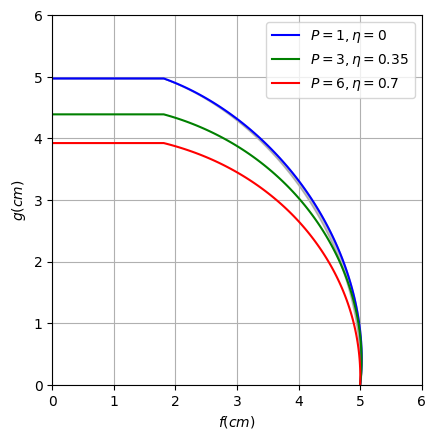

In [104]:
#define parameters [g/cm]
a11 = 42
a12 = 22
a21 = 22
a22 = 73

#max contraction strain
epsilon = 0.5

L = 6
R = 5

# Define ODEs function
def ODEs(s, Y, P, eta):
    dY = np.zeros(2)
    fbar = R * np.cos(s / R)
    
    dY[0] = (1 - epsilon * eta) * Y[1] / np.sqrt(Y[1]**2 + 1) * (1 - a12 / a11 * (Y[0] / fbar - 1) + P * Y[0]**2 * np.sqrt(Y[1]**2 + 1) / (2 * a11 * fbar))
    dY[1] = (2 * (a11 * a22 - a12 * a21) / (a11 * P * Y[0]**2)) * (Y[0] / fbar - 1) + a21 * np.sqrt(Y[1]**2 + 1) / (a11 * fbar) - 2 * (1 - epsilon * eta) * np.sqrt(Y[1]**2 + 1) / Y[0] * (1 - a12 / a11 * (Y[0] / fbar - 1) + P * Y[0]**2 * np.sqrt(Y[1]**2 + 1) / (2 * a11 * fbar))
    
    return dY

def solve_case(P, eta, Y0):
    s = np.linspace(0, L, 100)
    sspan = [s[0], s[-1]]
    sol = solve_ivp(ODEs, sspan, Y0, args=(P, eta), t_eval=s)
    f = sol.y[0, :]
    F = sol.y[1, :]
    fbar = R * np.cos(s / R)
    fprime = (1 - epsilon * eta) * F / np.sqrt(F**2 + 1) * (1 - a12 / a11 * (f / fbar - 1) + P * f**2 * np.sqrt(F**2 + 1) / (2 * a11 * fbar))
    gprime = fprime / F

    # Calculate g using numerical integration
    delta_s = L / (len(s) - 1)
    g = np.zeros_like(s)
    for i in range(1, len(s)):
        g[i] = g[i - 1] + gprime[i - 1] * delta_s

    return s, f, g

# Solve for the three cases
s1, f1, g1 = solve_case(1, 0, [R, 0.119312])
s2, f2, g2 = solve_case(3, 0.35, [R, 0.112315])
s3, f3, g3 = solve_case(6, 0.7, [R, 0.036140])

# Extend lines to the g axis
f1 = np.append(f1, 0)
g1 = np.append(g1, g1[-1])

f2 = np.append(f2, 0)
g2 = np.append(g2, g2[-1])

f3 = np.append(f3, 0)
g3 = np.append(g3, g3[-1])

# Plot 2D graph with filled area between blue and red lines
plt.plot(f1, g1, 'b', label=r'$P = 1, \eta = 0$')
plt.plot(f2, g2, 'g', label=r'$P = 3, \eta = 0.35$')
plt.plot(f3, g3, 'r', label=r'$P = 6, \eta = 0.7$')
plt.fill_betweenx(g1, f1, f3, where=(f1 >= 0) & (f3 >= 0), color='grey', alpha=0.5)
plt.xlabel('$f (cm)$')
plt.ylabel('$g (cm)$')
plt.axis('square')
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.grid(True)
plt.legend()
plt.savefig('2D_Plot_with_Area_Extended.pdf', dpi=200)
plt.show()

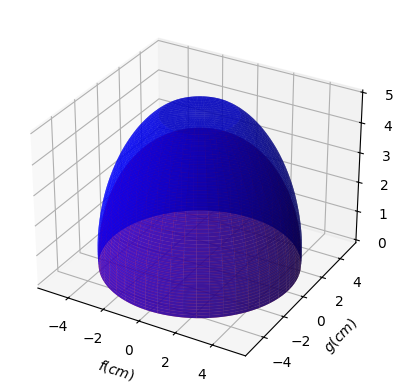

In [105]:
# Create 3D plot by rotating the filled area around the g-axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g1[-1], 100)
theta, g = np.meshgrid(theta, g)

f_top = np.interp(g[:, 0], g1, f1)
f_bottom = np.interp(g[:, 0], g3, f3)

X_top = f_top[:, None] * np.cos(theta)
Y_top = f_top[:, None] * np.sin(theta)
Z_top = np.tile(g[:, 0], (theta.shape[1], 1)).T

X_bottom = f_bottom[:, None] * np.cos(theta)
Y_bottom = f_bottom[:, None] * np.sin(theta)
Z_bottom = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X_top, Y_top, Z_top, color='b', alpha=0.7)
ax.plot_surface(X_bottom, Y_bottom, Z_bottom, color='r', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')

plt.savefig('3D_Dome_Shape_Extended.pdf', dpi=200)
plt.show()

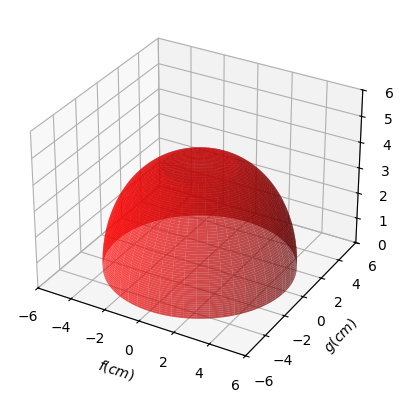

In [106]:
# for p=6 n=0.7
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g3[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g3, f3)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='r', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

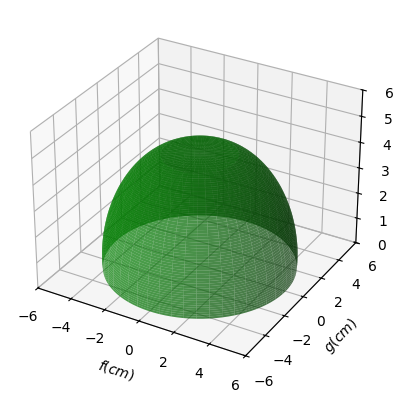

In [107]:
# for p=3 n=0.35
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g2[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g2, f2)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='g', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

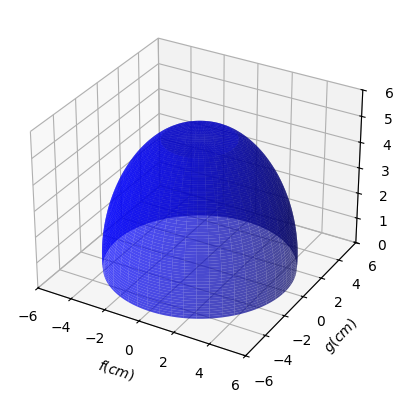

In [108]:
# for p=1 n=0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g1[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g1, f1)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='b', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

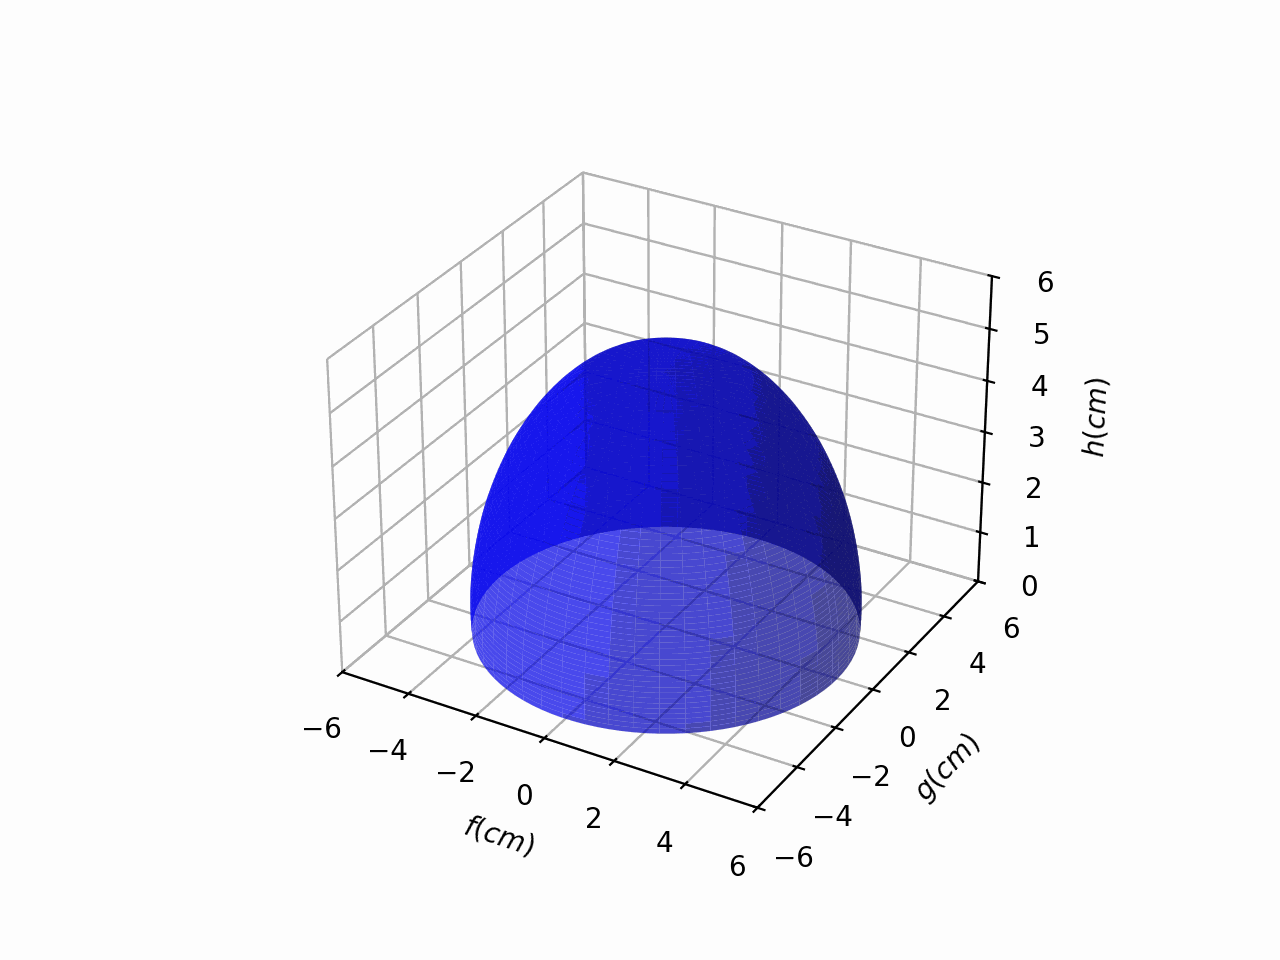

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio

# Function to create 3D plots
def create_3d_plot(f, g, color, filename):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    theta = np.linspace(0, 2 * np.pi, 100)
    g_vals = np.linspace(0, g[-1], 100)
    theta, g_vals = np.meshgrid(theta, g_vals)

    f_interp = np.interp(g_vals[:, 0], g, f)

    X = f_interp[:, None] * np.cos(theta)
    Y = f_interp[:, None] * np.sin(theta)
    Z = np.tile(g_vals[:, 0], (theta.shape[1], 1)).T

    ax.plot_surface(X, Y, Z, color=color, alpha=0.7)

    ax.set_xlabel('$f (cm)$')
    ax.set_ylabel('$g (cm)$')
    ax.set_zlabel('$h (cm)$')
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([0, 6])

    plt.savefig(filename, dpi=200)
    plt.close()

# Generate frames
def generate_frames():
    # Assuming f1, g1, f2, g2, f3, and g3 are already defined
    create_3d_plot(f1, g1, 'b', 'frame1.png')
    create_3d_plot(f2, g2, 'b', 'frame2.png')
    create_3d_plot(f3, g3, 'b', 'frame3.png')

# Generate the frames
generate_frames()

# Create the continuous GIF
def create_continuous_gif():
    frames = []
    frame_files = ['frame1.png', 'frame2.png', 'frame3.png']

    # Add frames for the forward transition
    for file in frame_files:
        frames.append(imageio.imread(file))
    
    # Add frames for the backward transition
    for file in reversed(frame_files[1:-1]):
        frames.append(imageio.imread(file))

    # Create the GIF with infinite loop and 1 second per frame (5 frames total for 5 seconds)
    imageio.mimsave('3d_continuous_transition.gif', frames, duration=1000, loop=0)

# Create the continuous GIF
create_continuous_gif()

# Display the GIF
from IPython.display import Image
Image(filename='3d_continuous_transition.gif')


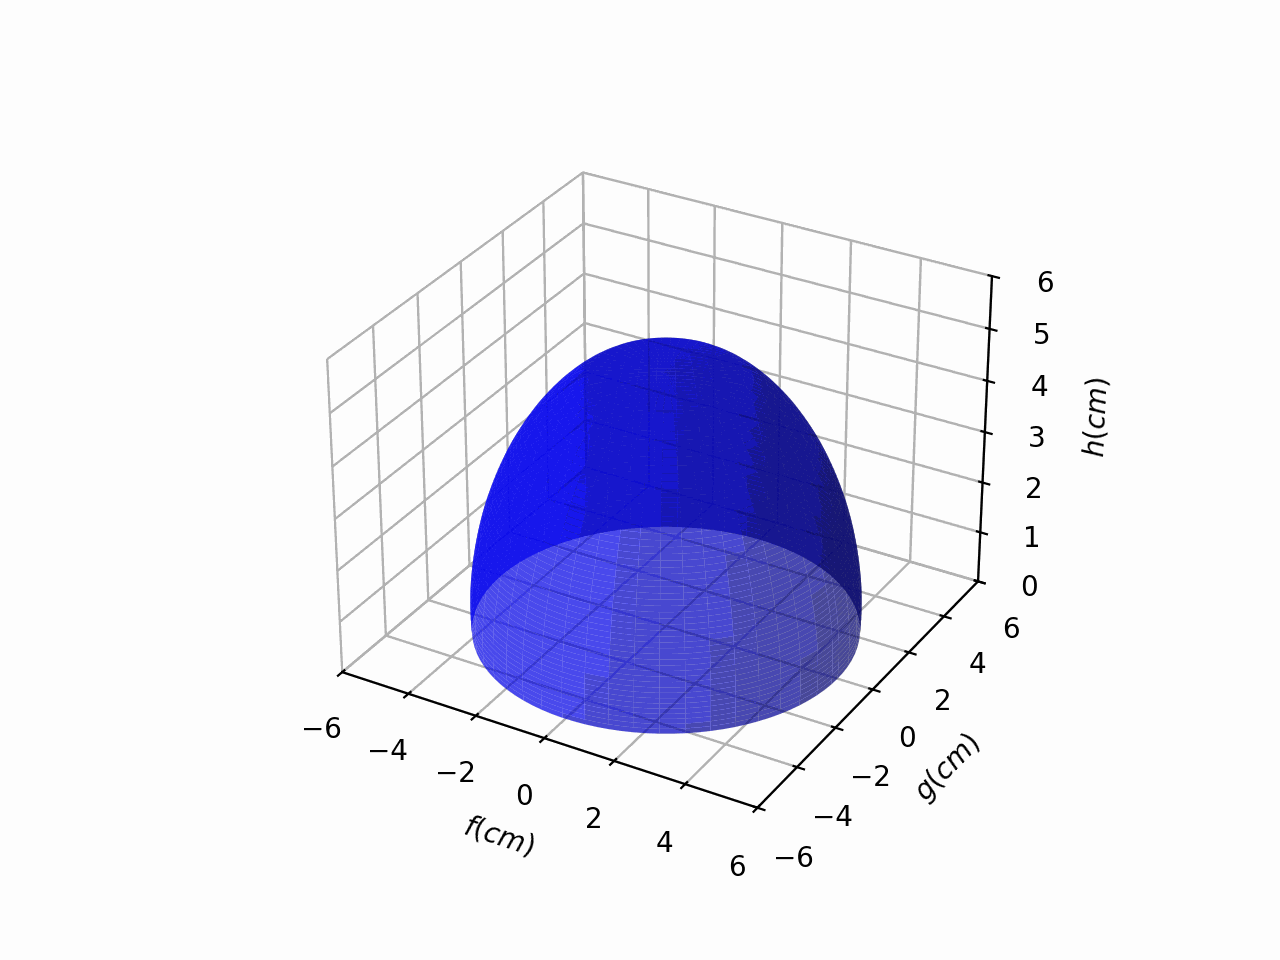

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio

# Function to create 3D plots
def create_3d_plot(f, g, color, filename):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    theta = np.linspace(0, 2 * np.pi, 100)
    g_vals = np.linspace(0, g[-1], 100)
    theta, g_vals = np.meshgrid(theta, g_vals)

    f_interp = np.interp(g_vals[:, 0], g, f)

    X = f_interp[:, None] * np.cos(theta)
    Y = f_interp[:, None] * np.sin(theta)
    Z = np.tile(g_vals[:, 0], (theta.shape[1], 1)).T

    ax.plot_surface(X, Y, Z, color=color, alpha=0.7)

    ax.set_xlabel('$f (cm)$')
    ax.set_ylabel('$g (cm)$')
    ax.set_zlabel('$h (cm)$')
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([0, 6])

    plt.savefig(filename, dpi=200)
    plt.close()

# Generate frames
def generate_frames():
    # Assuming f1, g1, f2, g2, f3, and g3 are already defined
    create_3d_plot(f1, g1, 'b', 'frame1.png')
    create_3d_plot(f2, g2, 'b', 'frame2.png')
    create_3d_plot(f3, g3, 'b', 'frame3.png')

# Generate the frames
generate_frames()

# Create the continuous GIF
def create_continuous_gif():
    frames = []
    frame_files = ['frame1.png', 'frame2.png', 'frame3.png']

    # Add frames for the forward transition
    for file in frame_files:
        frames.append(imageio.imread(file))
    
    # Add frames for the backward transition
    for file in reversed(frame_files[1:-1]):
        frames.append(imageio.imread(file))

    # Create the GIF with infinite loop and 1 second per frame (5 frames total for 5 seconds)
    imageio.mimsave('3d_continuous_transition_2.gif', frames, duration=1000, loop=0)

# Create the continuous GIF
create_continuous_gif()

# Display the GIF
from IPython.display import Image
Image(filename='3d_continuous_transition_2.gif')

[5.         5.00725178 5.01341128 5.01849401 5.02251196 5.0254766
 5.02739942 5.0282919  5.02816553 5.02703179 5.02490219 5.02178822
 5.01770139 5.0126532  5.00665518 4.99971883 4.99185568 4.98307751
 4.97339446 4.96281288 4.95133917 4.93897999 4.92574233 4.91163345
 4.89666091 4.88083258 4.86415659 4.84664141 4.82829578 4.80912872
 4.78914957 4.76836795 4.7467938  4.72443731 4.701309   4.6774201
 4.65278483 4.62740669 4.60128685 4.57442714 4.54683003 4.51849864
 4.48943672 4.45964871 4.42913964 4.39791523 4.36598183 4.33334643
 4.30001668 4.26600087 4.23130795 4.19594749 4.15992973 4.12326554
 4.08596645 4.04804464 4.00951292 3.97038476 3.93067426 3.89039618
 3.84956062 3.80816804 3.76621889 3.72371425 3.68065581 3.63704591
 3.5928875  3.54818418 3.50294016 3.4571603  3.41085008 3.36401561
 3.31666362 3.26880149 3.22043722 3.17157943 3.1222374  3.072421
 3.02214077 2.97140784 2.92023399 2.86863165 2.81661385 2.76419425
 2.71138716 2.65820751 2.60467085 2.55079338 2.49659191 2.44207174

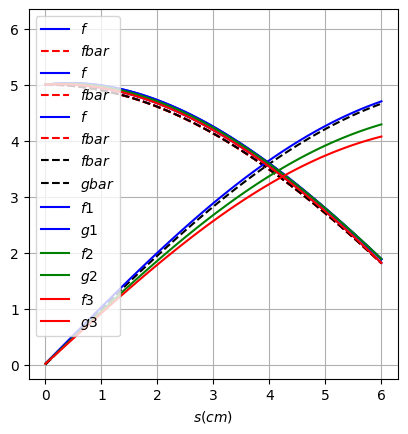

In [111]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import imageio.v2 as imageio

%matplotlib inline

#define parameters [g/cm]
a11 = 42
a12 = 22
a21 = 22
a22 = 73

#max contraction strain
epsilon = 0.5

L = 6
R = 5

# Case 1: p = 2 g/cm^2,  eta = 0.19
P = 2
eta = 0.19

#define ODEs:
def ODEs(s,Y):
    dY = np.zeros(2)
    f_bar = R*np.cos(s/R)
    
    dY[0] = (1-epsilon*eta)*Y[1]/((Y[1]**2+1)**0.5)*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/2/a11/f_bar)
    dY[1] = (2*(a11*a22-a12*a21)/(a11*P*Y[0]**2))*(Y[0]/f_bar-1) + a21*((Y[1]**2+1)**0.5)/(a11*f_bar)-2*(1-epsilon*eta)*((Y[1]**2+1)**0.5)/Y[0]*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/(2*a11*f_bar))
    
    return dY

Rt= R*np.cos(L/R)

#initial conditions:
Y0 = [R, 0.128052]

#define range of integration:
s = np.linspace(0,L,100)
sspan = [s[0],s[-1]]

f_bar = R*np.cos(s/R)
g_bar = R*np.sin(s/R)

#solve the system
sol = solve_ivp(ODEs, sspan, Y0, t_eval = s)

plt.plot(s, sol.y[0, :], 'b', label = '$f$')
plt.plot(s, f_bar, 'r--', label = '$fbar$')
plt.xlabel('s(cm)')
plt.legend()
plt.grid(True)

f_1 = sol.y[0,:]
F_1 = sol.y[1,:]
fprime_1 = (1-epsilon*eta)*F_1/((F_1**2+1)**0.5)*(1-a12/a11*(f_1/f_bar-1)+P*f_1**2*((F_1**2+1)**0.5)/2/a11/f_bar)
gprime_1 = fprime_1/F_1

#find g1
g_0 = 0
n = 99
delta_s = L/n
i = 0
g_1 = np.zeros(100)
while i <= n:
    g_1[i] = gprime_1[i-1]*delta_s + g_1[i-1]
    i = i + 1

print(f_1, g_1)

lambda1_1 = gprime_1*(F_1**2+1)**0.5/(1-epsilon*eta)
lambda2_1 = f_1/f_bar

S1_1 = a11*(lambda1_1-1)+a12*(lambda2_1-1)
S2_1 = a21*(lambda1_1-1)+a22*(lambda2_1-1)

print(s, f_bar, g_bar)

# Case 2: p = 4 g/cm^2, eta = 0.48
P = 4
eta = 0.48

#define ODEs:
def ODEs(s,Y):
    dY = np.zeros(2)
    f_bar = R*np.cos(s/R)
    
    dY[0] = (1-epsilon*eta)*Y[1]/((Y[1]**2+1)**0.5)*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/2/a11/f_bar)
    dY[1] = (2*(a11*a22-a12*a21)/(a11*P*Y[0]**2))*(Y[0]/f_bar-1) + a21*((Y[1]**2+1)**0.5)/(a11*f_bar)-2*(1-epsilon*eta)*((Y[1]**2+1)**0.5)/Y[0]*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/(2*a11*f_bar))
    
    return dY

Rt= R*np.cos(L/R)

#initial conditions:
Y0 = [R, 0.097315]

#define range of integration:
s = np.linspace(0,L,100)
sspan = [s[0],s[-1]]

f_bar = R*np.cos(s/R)
g_bar = R*np.sin(s/R)

#solve the system
sol = solve_ivp(ODEs, sspan, Y0, t_eval = s)

plt.plot(s, sol.y[0, :], 'b', label = '$f$')
plt.plot(s, f_bar, 'r--', label = '$fbar$')
plt.xlabel('s(cm)')
plt.legend()
plt.grid(True)

f_2 = sol.y[0,:]
F_2 = sol.y[1,:]
fprime_2 = (1-epsilon*eta)*F_2/((F_2**2+1)**0.5)*(1-a12/a11*(f_2/f_bar-1)+P*f_2**2*((F_2**2+1)**0.5)/2/a11/f_bar)
gprime_2 = fprime_2/F_2

#find g2
g_0 = 0
n = 99
delta_s = L/n
i = 0
g_2 = np.zeros(100)
while i <= n:
    g_2[i] = gprime_2[i-1]*delta_s + g_2[i-1]
    i = i + 1

print(f_2, g_2)

lambda1_2 = gprime_2*(F_2**2+1)**0.5/(1-epsilon*eta)
lambda2_2 = f_2/f_bar

S1_2 = a11*(lambda1_2-1)+a12*(lambda2_2-1)
S2_2 = a21*(lambda1_2-1)+a22*(lambda2_2-1)

# Case 3: p = 5 g/cm^2, eta = 0.6
P = 5
eta = 0.6

#define ODEs:
def ODEs(s,Y):
    dY = np.zeros(2)
    f_bar = R*np.cos(s/R)
    
    dY[0] = (1-epsilon*eta)*Y[1]/((Y[1]**2+1)**0.5)*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/2/a11/f_bar)
    dY[1] = (2*(a11*a22-a12*a21)/(a11*P*Y[0]**2))*(Y[0]/f_bar-1) + a21*((Y[1]**2+1)**0.5)/(a11*f_bar)-2*(1-epsilon*eta)*((Y[1]**2+1)**0.5)/Y[0]*(1-a12/a11*(Y[0]/f_bar-1)+P*Y[0]**2*((Y[1]**2+1)**0.5)/(2*a11*f_bar))
    
    return dY

Rt= R*np.cos(L/R)

#initial conditions:
Y0 = [R, 0.064140]

#define range of integration:
s = np.linspace(0,L,100)
sspan = [s[0],s[-1]]

f_bar = R*np.cos(s/R)
g_bar = R*np.sin(s/R)

#solve the system
sol = solve_ivp(ODEs, sspan, Y0, t_eval = s)

plt.plot(s, sol.y[0, :], 'b', label = '$f$')
plt.plot(s, f_bar, 'r--', label = '$fbar$')
plt.xlabel('s(cm)')
plt.legend()
plt.grid(True)

f_3 = sol.y[0,:]
F_3 = sol.y[1,:]
fprime_3 = (1-epsilon*eta)*F_3/((F_3**2+1)**0.5)*(1-a12/a11*(f_3/f_bar-1)+P*f_3**2*((F_3**2+1)**0.5)/2/a11/f_bar)
gprime_3 = fprime_3/F_3

#find g3
g_0 = 0
n = 99
delta_s = L/n
i = 0
g_3 = np.zeros(100)
while i <= n:
    g_3[i] = gprime_3[i-1]*delta_s + g_3[i-1]
    i = i + 1

print(f_3, g_3)

lambda1_3 = gprime_3*(F_3**2+1)**0.5/(1-epsilon*eta)
lambda2_3 = f_3/f_bar

S1_3 = a11*(lambda1_3-1)+a12*(lambda2_3-1)
S2_3 = a21*(lambda1_3-1)+a22*(lambda2_3-1)

plt.plot(s, f_bar, 'k--', label = '$fbar$')
plt.plot(s, g_bar, 'k--', label = '$gbar$')

plt.plot(s, f_1, 'b', label = '$f1$')
plt.plot(s, g_1, 'b', label = '$g1$')

plt.plot(s, f_2, 'g', label = '$f2$')
plt.plot(s, g_2, 'g', label = '$g2$')

plt.plot(s, f_3, 'r', label = '$f3$')
plt.plot(s, g_3, 'r', label = '$g3$')

plt.xlabel('$s(cm)$')
plt.axis('square')
plt.legend()
plt.grid(True)

STEP 2: P=1 to P=6 plots all at once


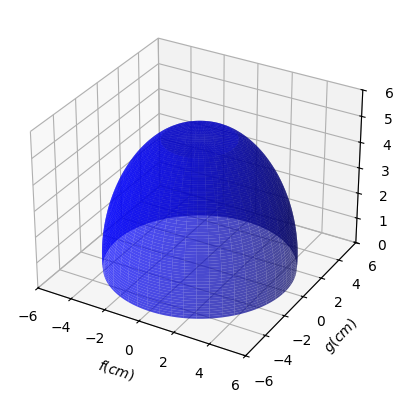

In [112]:
# for p=1 n=0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g1[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g1, f1)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='b', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

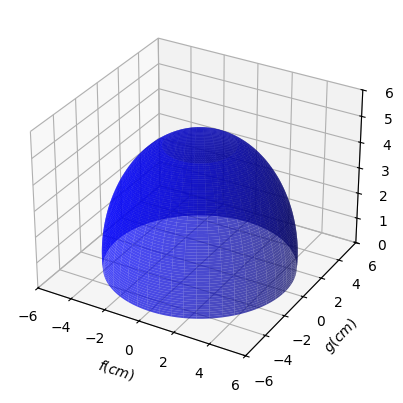

In [113]:
# for p=2 n=0.19
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g_1[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g_1, f_1)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='b', alpha=0.7)

# Adding the top cap
top_r = np.interp(g_1[-1], g_1, f_1)
theta_top = np.linspace(0, 2 * np.pi, 100)
X_top = top_r * np.cos(theta_top)
Y_top = top_r * np.sin(theta_top)
Z_top = np.full_like(X_top, g_1[-1])

ax.plot_trisurf(X_top, Y_top, Z_top, color='b', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

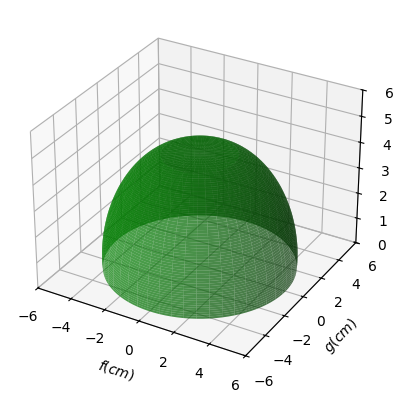

In [114]:
# for p=3 n=0.35
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g2[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g2, f2)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='g', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

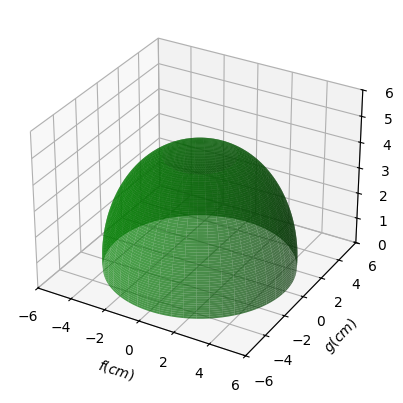

In [115]:
# for p=4 n=0.48
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g_2[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g_2, f_2)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='g', alpha=0.7)

# Adding the top cap
top_r = np.interp(g_2[-1], g_2, f_2)
theta_top = np.linspace(0, 2 * np.pi, 100)
X_top = top_r * np.cos(theta_top)
Y_top = top_r * np.sin(theta_top)
Z_top = np.full_like(X_top, g_2[-1])

ax.plot_trisurf(X_top, Y_top, Z_top, color='g', alpha=0.7)

ax.set_xlabel('$f (cm)$')

ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

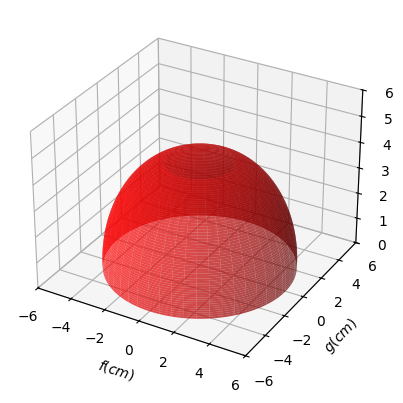

In [121]:
# for p=5 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g_3[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g_3, f_3)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='r', alpha=0.7)

# Adding the top cap
top_r = np.interp(g_3[-1], g_3, f_3)
theta_top = np.linspace(0, 2 * np.pi, 100)
X_top = top_r * np.cos(theta_top)
Y_top = top_r * np.sin(theta_top)
Z_top = np.full_like(X_top, g_3[-1])

ax.plot_trisurf(X_top, Y_top, Z_top, color='r', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

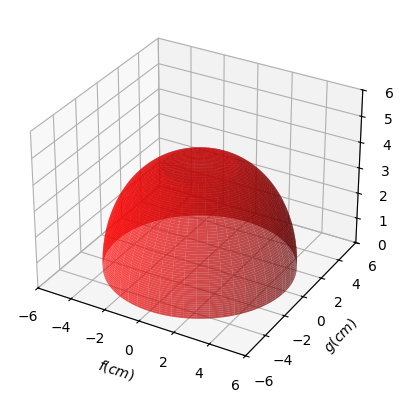

In [123]:
# for p=6 n=0.7
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
g = np.linspace(0, g3[-1], 100)
theta, g = np.meshgrid(theta, g)

f3_interp = np.interp(g[:, 0], g3, f3)

X = f3_interp[:, None] * np.cos(theta)
Y = f3_interp[:, None] * np.sin(theta)
Z = np.tile(g[:, 0], (theta.shape[1], 1)).T

ax.plot_surface(X, Y, Z, color='r', alpha=0.7)

ax.set_xlabel('$f (cm)$')
ax.set_ylabel('$g (cm)$')
ax.set_zlabel('$h (cm)$')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([0, 6])

plt.savefig('3D_Rotated_Shape_Extended.pdf', dpi=200)
plt.show()

STEP 3: Simulation video


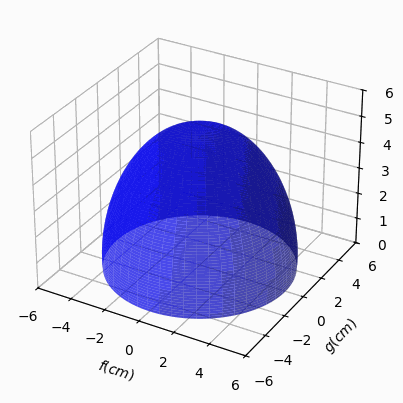

In [131]:
from PIL import Image
import os

# Path to your frames
frames_path = r'C:\Users\shafi\OneDrive\Desktop\frames\\'

# List frames in order
frames = []
for i in range(1, 7):
    frame = Image.open(os.path.join(frames_path, f'output_{i}.png'))
    frames.append(frame)
for i in range(6, 0, -1):
    frame = Image.open(os.path.join(frames_path, f'output_{i}.png'))
    frames.append(frame)

# Save as a GIF
frames[0].save(os.path.join(frames_path, 'output_animation.gif'),
               save_all=True, append_images=frames[1:], duration=400, loop=0)

from IPython.display import display, Image

# Path to your GIF file
gif_path = r'C:\Users\shafi\OneDrive\Desktop\frames\output_animation.gif'

# Display the GIF
with open(gif_path, 'rb') as f:
    display(Image(data=f.read(), format='png'))

